In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import joblib
import gc
import warnings
import sys
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
import math
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from joblib import parallel_backend
import dill
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.metrics import confusion_matrix
sb.set()

In [70]:
time_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\time_1.csv")
freq_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\freq_1.csv")

combined_1 = pd.concat([time_1, freq_1], axis=1)
combined_1=combined_1[combined_1['0']!=2]
combined_1.dropna(inplace=True)
combined_1

,0,skew_A_F,sma_A_F,wl_A_F,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,...,dom_freq_T_L,PSD_A_F,PSD_A_V,PSD_A_L,PSD_L_F,PSD_L_V,PSD_L_L,PSD_T_F,PSD_T_V,PSD_T_L
0,0,3.846394,5100,4462,68.750000,717,-70,16989.531250,130.343896,147.363814,...,1.0,1894.957381,954.811505,7043.120568,4209.412498,745.755428,1911.231213,941.858134,660.628524,795.127197
1,0,0.932827,3335,1244,50.546875,181,-20,1195.091553,34.570096,61.237881,...,2.0,970.741933,323.149341,432.301145,5192.968622,806.509362,2072.246104,1747.466259,1030.722582,2175.474876
2,0,0.264857,3080,550,48.125000,70,30,87.109375,9.333240,49.021679,...,1.0,84.602203,51.807698,148.545143,103.028758,76.013180,197.524929,79.415505,90.144715,218.254358
3,0,0.174927,2800,560,43.750000,60,30,76.562500,8.750000,44.616421,...,1.0,64.886657,136.451992,87.203041,83.197025,61.507150,210.082181,102.137324,79.058160,182.475729
4,0,0.016939,2860,650,44.687500,70,20,137.402344,11.721875,46.199297,...,1.0,132.705782,94.467866,179.654367,69.435574,81.830171,226.362754,97.788078,88.475250,149.479574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1,-1.713137,9398,6245,92.000000,464,-545,25757.500000,160.491433,184.990540,...,4.0,20960.686407,3262.574277,10795.990570,60007.072523,4275.979192,7600.165335,9757.235209,8615.972304,1412.921772
1559,1,-0.719333,5449,5458,38.265625,434,-454,14449.195068,120.204805,126.148536,...,6.0,16416.640259,1235.263876,10635.509406,25488.078201,2390.466137,6956.156900,11564.060848,6438.511089,3930.275667
1560,1,-1.616846,7941,5304,55.140625,333,-464,22293.339600,149.309543,159.166039,...,2.0,28166.000402,1229.826653,13106.068491,36566.717891,2470.542657,22593.233076,17113.748504,5014.426007,4749.558881
1561,1,-1.933476,8284,6170,38.718750,535,-858,37861.170898,194.579472,198.394336,...,1.0,66595.353775,12694.903032,37421.301959,213879.381123,24725.045578,27417.631906,10783.989836,10760.429678,8311.451470


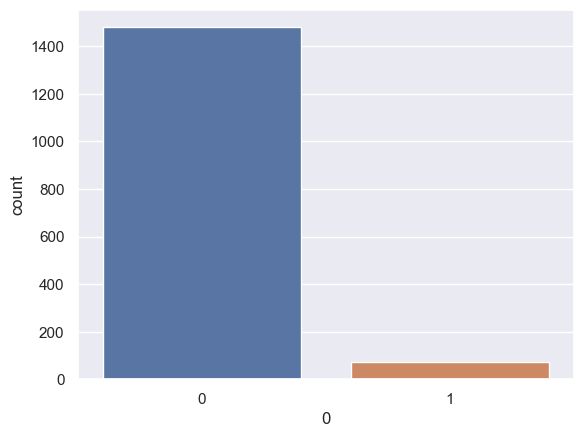

In [71]:
X = combined_1.drop('0', axis=1)
y = combined_1['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [72]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [73]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [74]:
def getsize(model):
  p = pickle.dumps(model)
  return sys.getsizeof(p)

For Training Data:
Accuracy: 0.5932432432432433
Precision: 0.9758620689655172
Recall: 0.1912162162162162
F1-Score: 0.319774011299435
Sensitivity: 0.1912162162162162
Specificity: 0.9952702702702703


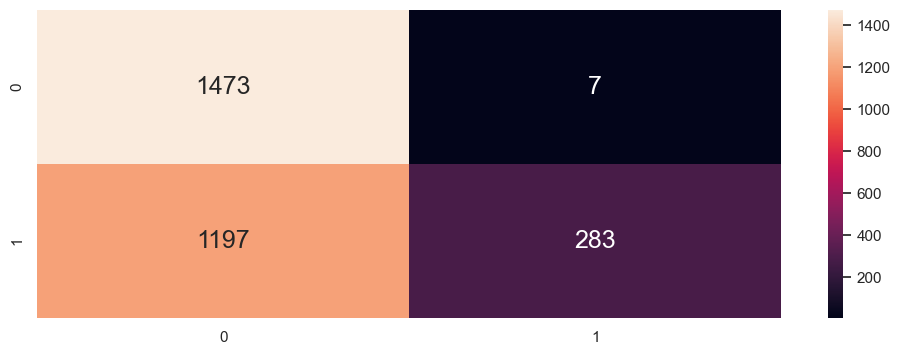

In [75]:
search = joblib.load(r"C:\Users\Admin\Desktop\Models\rf_new_model.joblib")

rf_y_pred = search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, rf_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, rf_y_pred))
print('Precision:', precision_score(y, rf_y_pred))
print('Recall:', recall_score(y, rf_y_pred))
print('F1-Score:', f1_score(y, rf_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


f, axes = plt.subplots(1, 1, figsize=(12, 4))
sb.heatmap(confusion_matrix(y, rf_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

For Training Data:
Accuracy: 0.6746621621621621
Precision: 0.6877269426289034
Recall: 0.6398648648648648
F1-Score: 0.6629331466573328
Sensitivity: 0.6398648648648648
Specificity: 0.7094594594594594


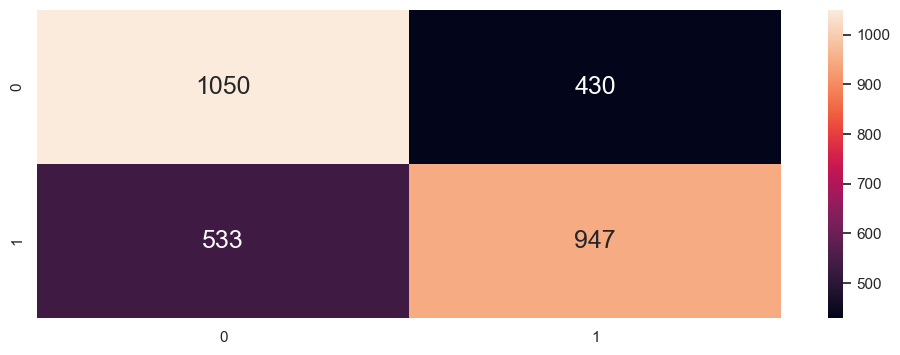

In [76]:
search = joblib.load(r"C:\Users\Admin\Desktop\Models\dt_new_model.joblib")

rf_y_pred = search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, rf_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, rf_y_pred))
print('Precision:', precision_score(y, rf_y_pred))
print('Recall:', recall_score(y, rf_y_pred))
print('F1-Score:', f1_score(y, rf_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


f, axes = plt.subplots(1, 1, figsize=(12, 4))
sb.heatmap(confusion_matrix(y, rf_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

For Training Data:
Accuracy: 0.8307432432432432
Precision: 0.8957154405820533
Recall: 0.7486486486486487
F1-Score: 0.8156054471843946
Sensitivity: 0.7486486486486487
Specificity: 0.9128378378378378


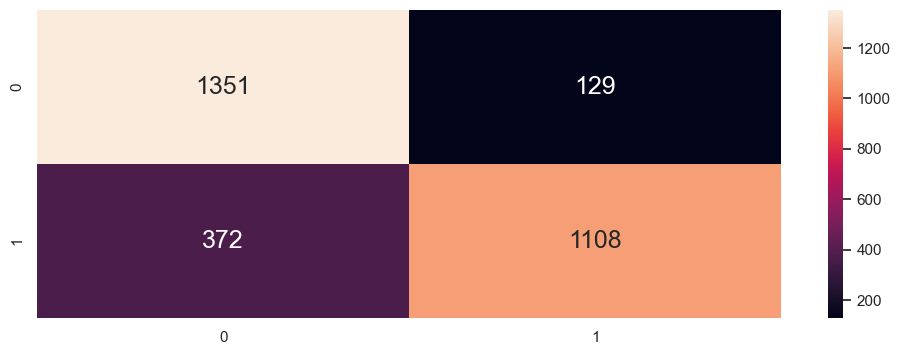

In [77]:
search = joblib.load(r"C:\Users\Admin\Desktop\Models\lgm_new_model.joblib")

rf_y_pred = search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, rf_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, rf_y_pred))
print('Precision:', precision_score(y, rf_y_pred))
print('Recall:', recall_score(y, rf_y_pred))
print('F1-Score:', f1_score(y, rf_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


f, axes = plt.subplots(1, 1, figsize=(12, 4))
sb.heatmap(confusion_matrix(y, rf_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

For Training Data:
Accuracy: 0.8064189189189189
Precision: 0.9218604651162791
Recall: 0.6695945945945946
F1-Score: 0.77573385518591
Sensitivity: 0.6695945945945946
Specificity: 0.9432432432432433


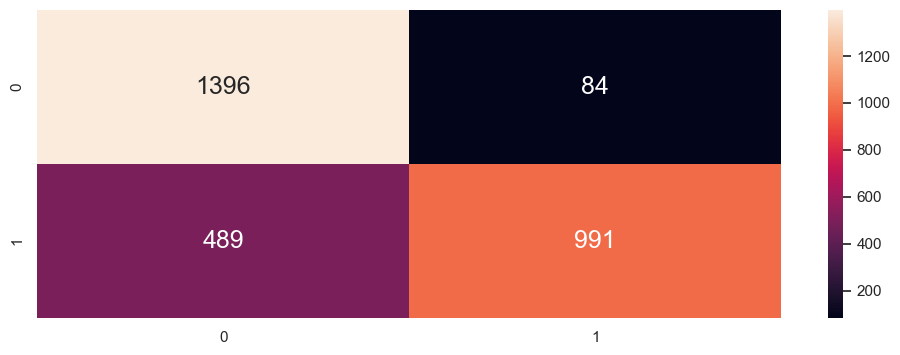

In [78]:
search = joblib.load(r"C:\Users\Admin\Desktop\Models\xgb_new_model.joblib")

rf_y_pred = search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, rf_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, rf_y_pred))
print('Precision:', precision_score(y, rf_y_pred))
print('Recall:', recall_score(y, rf_y_pred))
print('F1-Score:', f1_score(y, rf_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


f, axes = plt.subplots(1, 1, figsize=(12, 4))
sb.heatmap(confusion_matrix(y, rf_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

For Training Data:
Accuracy: 0.6139283299526708
Precision: 0.9719887955182073
Recall: 0.23461798512508453
F1-Score: 0.377995642701525
Sensitivity: 0.23461798512508453
Specificity: 0.993238674780257


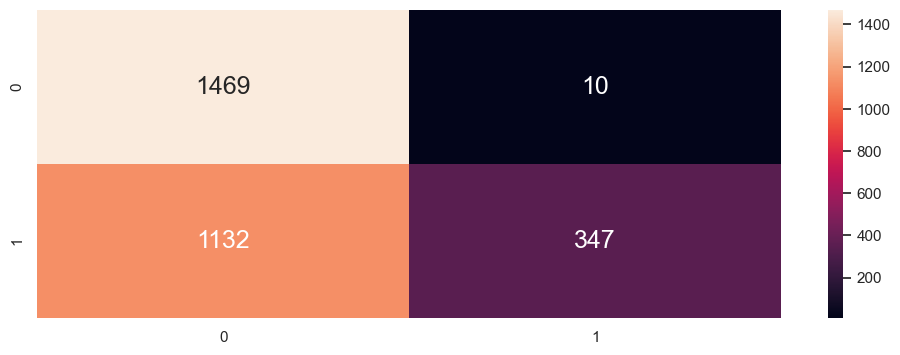

In [63]:
search = joblib.load(r"C:\Users\Admin\Desktop\Models\svc_new_model.joblib")

rf_y_pred = search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, rf_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, rf_y_pred))
print('Precision:', precision_score(y, rf_y_pred))
print('Recall:', recall_score(y, rf_y_pred))
print('F1-Score:', f1_score(y, rf_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


f, axes = plt.subplots(1, 1, figsize=(12, 4))
sb.heatmap(confusion_matrix(y, rf_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

For Training Data:
Accuracy: 0.8147396889790399
Precision: 0.7590428491930996
Recall: 0.9222447599729547
F1-Score: 0.8327228327228328
Sensitivity: 0.9222447599729547
Specificity: 0.7072346179851251


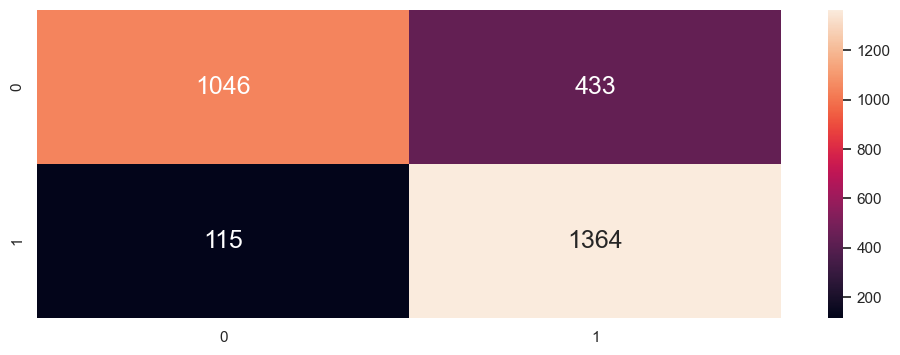

In [64]:
search = joblib.load(r"C:\Users\Admin\Desktop\Models\knn_new_model.joblib")

rf_y_pred = search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, rf_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, rf_y_pred))
print('Precision:', precision_score(y, rf_y_pred))
print('Recall:', recall_score(y, rf_y_pred))
print('F1-Score:', f1_score(y, rf_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


f, axes = plt.subplots(1, 1, figsize=(12, 4))
sb.heatmap(confusion_matrix(y, rf_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()